## MAI THỊ THẢO LY - 20280064

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

#drive.mount("/content/drive")

In [3]:
import pandas as pd
PATH = "HomeWork-churn_rate_prediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [4]:
df.info

<bound method DataFrame.info of                                 customer_id              Name  age gender   
0          fffe4300490044003600300030003800   Pattie Morrisey   18      F  \
1      fffe43004900440032003100300035003700       Traci Peery   32      F   
2          fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3      fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4      fffe43004900440031003900350030003600      Meghan Kosak   31      F   
...                                     ...               ...  ...    ...   
36987  fffe43004900440035003500390036003100          Cuc Tarr   46      F   
36988  fffe43004900440033003500380036003600    Jenni Stronach   29      F   
36989      fffe4300490044003500330034003100     Luciana Kinch   23      F   
36990  fffe43004900440031003200390039003000     Tawana Ardoin   53      M   
36991  fffe43004900440033003600340034003200  Verlene Beaulieu   35      M   

      security_no region_category  membersh

In [5]:
print("Qualitative columns \n")
print(df.describe(include=[object, int]))

Qualitative columns 

                             customer_id             Name           age   
count                              36992            36992  36992.000000  \
unique                             36992            36992           NaN   
top     fffe4300490044003600300030003800  Pattie Morrisey           NaN   
freq                                   1                1           NaN   
mean                                 NaN              NaN     37.118161   
std                                  NaN              NaN     15.867412   
min                                  NaN              NaN     10.000000   
25%                                  NaN              NaN     23.000000   
50%                                  NaN              NaN     37.000000   
75%                                  NaN              NaN     51.000000   
max                                  NaN              NaN     64.000000   

       gender security_no region_category membership_category joining_date   

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'days_since_last_login'}>],
       [<AxesSubplot:title={'center':'avg_time_spent'}>,
        <AxesSubplot:title={'center':'avg_transaction_value'}>],
       [<AxesSubplot:title={'center':'points_in_wallet'}>,
        <AxesSubplot:title={'center':'churn_risk_score'}>]], dtype=object)

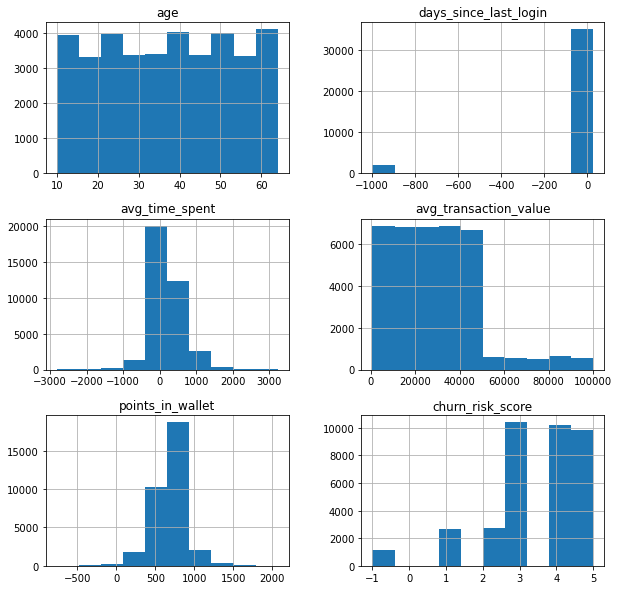

In [6]:
# histogram of dataframe
df.hist(figsize=(10,10))

## Data Analysis

In [7]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
print('categorical_cols\n',categorical_cols)
print('numerical_cols\n',numerical_cols)

categorical_cols
 ['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
numerical_cols
 ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [8]:
# Check Missing values
df[categorical_cols].isnull().sum()

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [9]:
df[numerical_cols].isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64

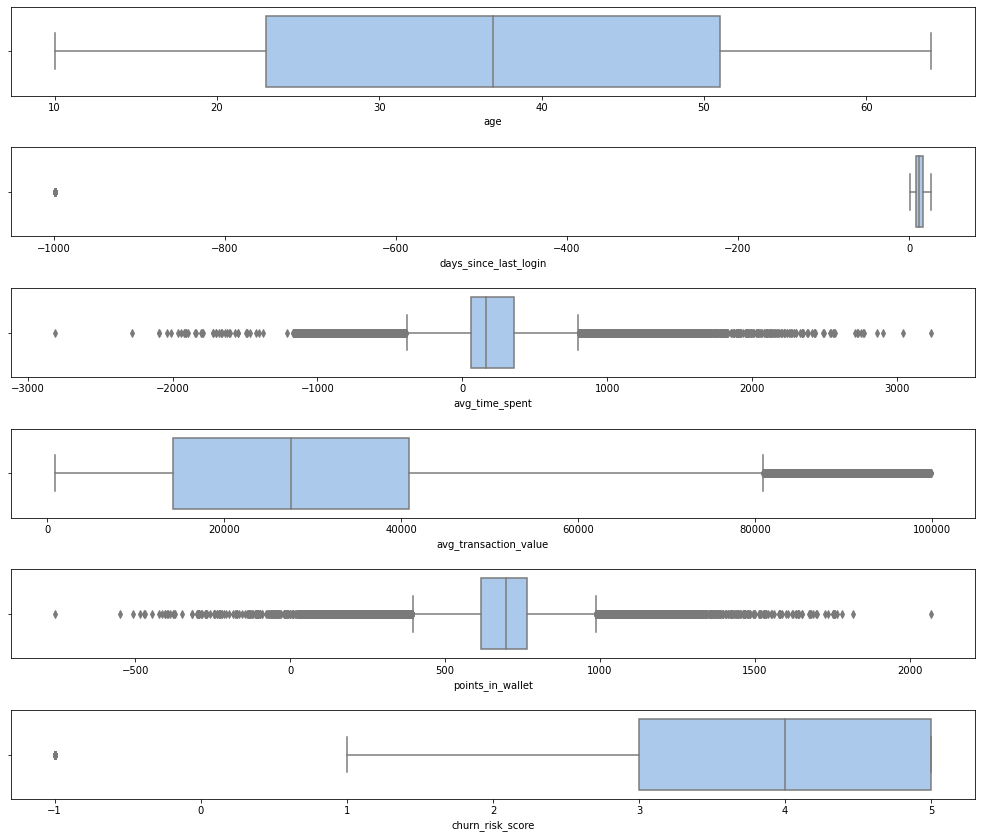

In [10]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='pastel',ax=axes[i])
plt.tight_layout(pad=2.0)

In [11]:
np.unique(df['churn_risk_score'])

array([-1,  1,  2,  3,  4,  5], dtype=int64)

In [12]:
temp=df['churn_risk_score']
np.unique(temp[temp<1])

array([-1], dtype=int64)

In [13]:
df['churn_risk_score'][df['churn_risk_score']<1]=np.nan
np.unique(df['churn_risk_score'])

C:\Users\maith\AppData\Local\Temp\ipykernel_9788\1475670537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn_risk_score'][df['churn_risk_score']<1]=np.nan


array([ 1.,  2.,  3.,  4.,  5., nan])

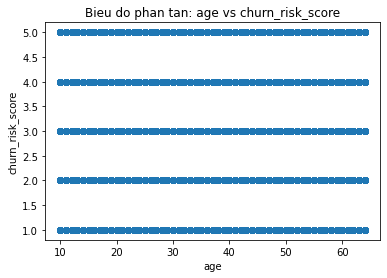

In [14]:
plt.title("Bieu do phan tan: age vs churn_risk_score")
plt.xlabel("age")
plt.ylabel("churn_risk_score")
plt.scatter(df['age'], df['churn_risk_score'])
plt.show()

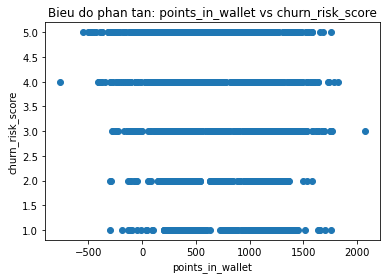

In [15]:
plt.title("Bieu do phan tan: points_in_wallet vs churn_risk_score")
plt.xlabel("points_in_wallet")
plt.ylabel("churn_risk_score")
plt.scatter(df['points_in_wallet'], df['churn_risk_score'])
plt.show()

## Preprocessing

In [16]:
df[df=='?']=np.nan
df[categorical_cols].isnull().sum()

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
referral_id                        0
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [17]:
df[numerical_cols].isnull().sum()

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score         1163
dtype: int64

In [18]:
def preprocessing_data(df):
    df['churn_risk_score'] = df['churn_risk_score'].fillna(method='ffill')
    df['region_category'] = df['region_category'].fillna(method='ffill')
    df['joined_through_referral'] = df['joined_through_referral'].fillna(method='ffill')
    df['preferred_offer_types'] = df['preferred_offer_types'].fillna(method='ffill')
    df['medium_of_operation'] = df['medium_of_operation'].fillna(method='bfill')
    df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
    return df

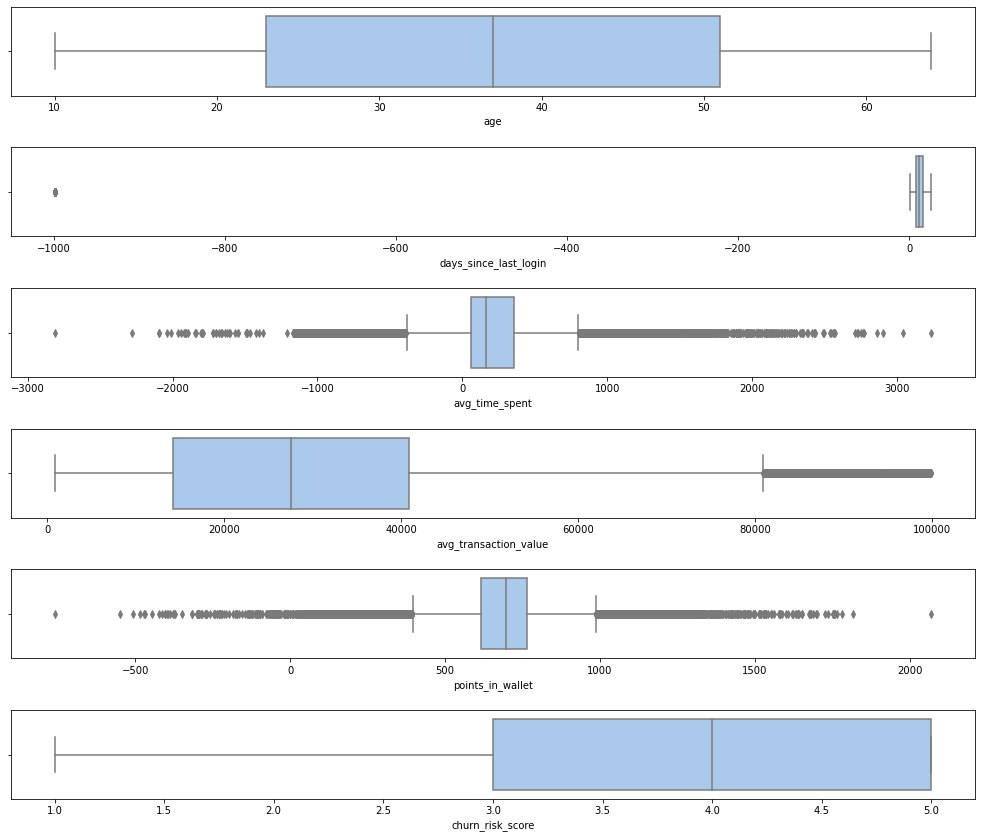

In [19]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='pastel',ax=axes[i])
plt.tight_layout(pad=2.0)

In [20]:
np.unique(df['churn_risk_score'])

array([ 1.,  2.,  3.,  4.,  5., nan])

In [21]:
df = preprocessing_data(df.copy())
df[categorical_cols].isnull().sum()

customer_id                     0
Name                            0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
avg_frequency_login_days        0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

In [22]:
df[numerical_cols].isnull().sum()

age                      0
days_since_last_login    0
avg_time_spent           0
avg_transaction_value    0
points_in_wallet         0
churn_risk_score         0
dtype: int64

## Feature Engineering

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,32243,28675,18,0,34811,2,3,959,0,11358,...,300.63,53005.25,746,781.750000,1,1,0,1,4,2.0
1,7055,34951,32,0,5804,0,4,970,0,2225,...,306.34,12838.38,732,686.882199,1,0,1,2,5,1.0
2,5910,25315,44,0,1534,1,2,680,1,471,...,516.16,21027.00,779,500.690000,0,1,1,3,3,5.0
3,32400,10462,37,1,32501,0,2,667,1,5506,...,53.27,25239.56,1637,567.660000,0,1,1,4,3,5.0
4,6070,24704,31,0,29819,0,2,985,0,11358,...,113.13,24483.66,743,663.060000,0,1,1,2,3,5.0


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
customer_id,1.000000e+00,0.002161,0.007659,0.012369,-0.005637,0.004482,-0.003078,5.394212e-07,0.002295,-0.003086,...,0.005494,-0.004324,0.004093,-0.003080,-0.001226,0.001363,0.001406,0.006272,0.000494,-0.000335
Name,2.161176e-03,1.000000,-0.003393,-0.003170,-0.001334,0.001909,0.002668,8.074432e-03,0.001495,0.006216,...,0.012951,0.003521,0.000844,0.001623,0.000658,0.003186,-0.000490,-0.000174,-0.000870,-0.007935
age,7.658611e-03,-0.003393,1.000000,0.000819,-0.001097,0.006608,0.000388,-1.049885e-02,0.001147,0.002214,...,0.001531,-0.000473,0.004420,0.000196,-0.005375,0.003090,0.001663,0.003429,-0.007230,0.002322
gender,1.236930e-02,-0.003170,0.000819,1.000000,0.008281,-0.001388,0.003766,2.355652e-03,-0.004347,0.006361,...,-0.009560,0.003694,0.005339,-0.009352,-0.000728,0.000333,-0.008200,0.000301,-0.001589,-0.005212
security_no,-5.637285e-03,-0.001334,-0.001097,0.008281,1.000000,0.006985,-0.011006,3.191102e-03,0.003014,0.002268,...,-0.000638,0.007594,0.001702,-0.002864,-0.002057,-0.000891,-0.008269,0.000468,0.011521,0.005481
region_category,4.482492e-03,0.001909,0.006608,-0.001388,0.006985,1.000000,0.015113,3.654183e-03,-0.004655,0.007819,...,0.001698,0.017487,-0.002037,0.013089,-0.002333,-0.001024,-0.000879,0.000302,0.018572,-0.027518
membership_category,-3.077931e-03,0.002668,0.000388,0.003766,-0.011006,0.015113,1.000000,-2.461825e-03,-0.011930,0.008202,...,0.005885,0.094190,-0.000236,0.162879,0.007350,0.004544,-0.010205,-0.007075,0.086677,-0.427571
joining_date,5.394212e-07,0.008074,-0.010499,0.002356,0.003191,0.003654,-0.002462,1.000000e+00,0.001746,-0.000425,...,0.005030,-0.000775,0.002023,0.001822,0.000530,-0.001183,-0.001305,0.001910,0.007094,0.010049
joined_through_referral,2.294984e-03,0.001495,0.001147,-0.004347,0.003014,-0.004655,-0.011930,1.745834e-03,1.000000,-0.598578,...,0.127880,-0.025900,-0.005899,-0.009398,0.018290,0.019286,-0.000008,0.000834,-0.030193,0.050676
referral_id,-3.086242e-03,0.006216,0.002214,0.006361,0.002268,0.007819,0.008202,-4.254451e-04,-0.598578,1.000000,...,-0.083460,0.026413,0.006995,0.007041,-0.019275,-0.007522,-0.005562,-0.002504,0.022681,-0.035196


<AxesSubplot:>

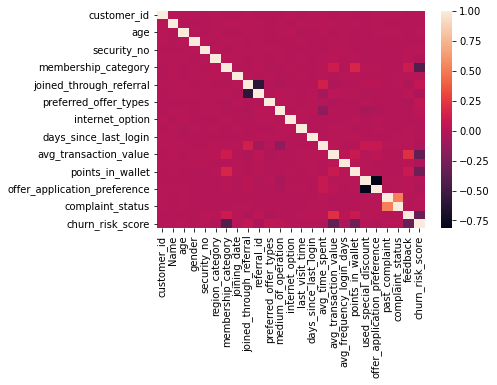

In [23]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    normalized_data = df.copy()
    normalized_data["customer_id"] = normalized_data["customer_id"].astype("category").cat.codes
    normalized_data["Name"] = normalized_data["Name"].astype("category").cat.codes
    normalized_data["gender"] = normalized_data["gender"].astype("category").cat.codes
    normalized_data["security_no"] = normalized_data["security_no"].astype("category").cat.codes
    normalized_data["region_category"] = normalized_data["region_category"].astype("category").cat.codes
    normalized_data["membership_category"] = normalized_data["membership_category"].astype("category").cat.codes
    normalized_data["joining_date"] = normalized_data["joining_date"].astype("category").cat.codes
    normalized_data["joined_through_referral"] = normalized_data["joined_through_referral"].astype("category").cat.codes
    normalized_data["referral_id"] = normalized_data["referral_id"].astype("category").cat.codes
    normalized_data["preferred_offer_types"] = normalized_data["preferred_offer_types"].astype("category").cat.codes
    normalized_data["medium_of_operation"] = normalized_data["medium_of_operation"].astype("category").cat.codes
    normalized_data["internet_option"] = normalized_data["internet_option"].astype("category").cat.codes
    normalized_data["last_visit_time"] = normalized_data["last_visit_time"].astype("category").cat.codes
    normalized_data["avg_frequency_login_days"] = normalized_data["avg_frequency_login_days"].astype("category").cat.codes
    normalized_data["used_special_discount"] = normalized_data["used_special_discount"].astype("category").cat.codes
    normalized_data["offer_application_preference"] = normalized_data["offer_application_preference"].astype("category").cat.codes
    normalized_data["past_complaint"] = normalized_data["past_complaint"].astype("category").cat.codes
    normalized_data["complaint_status"] = normalized_data["complaint_status"].astype("category").cat.codes
    normalized_data["feedback"] = normalized_data["feedback"].astype("category").cat.codes
    display(normalized_data.head())
    display(normalized_data.corr())
    return normalized_data

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [24]:
def prepare_X_y(df):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2
TRAIN_SIZE = 0.8

X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [25]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\maith\anaconda3\lib\site-packa

Best parameter (CV score=0.727):
{'scaler__feature_range': (-1, 1), 'tree__criterion': 'gini'}
              precision    recall  f1-score   support

         1.0       0.69      0.68      0.69       557
         2.0       0.70      0.70      0.70       579
         3.0       0.87      0.86      0.86      2146
         4.0       0.63      0.63      0.63      2098
         5.0       0.70      0.70      0.70      2019

    accuracy                           0.72      7399
   macro avg       0.72      0.71      0.71      7399
weighted avg       0.73      0.72      0.72      7399



In [27]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

pca = PCA()
clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("pca", pca),("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    "pca__n_components": [5, 15, 30, 35],
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=4)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\maith\anaconda3\lib\site-pack

Best parameter (CV score=0.520):
{'pca__n_components': 15, 'scaler__feature_range': (-1, 1), 'tree__criterion': 'entropy'}
              precision    recall  f1-score   support

         1.0       0.44      0.48      0.46       557
         2.0       0.41      0.39      0.40       579
         3.0       0.65      0.65      0.65      2146
         4.0       0.39      0.39      0.39      2098
         5.0       0.60      0.60      0.60      2019

    accuracy                           0.53      7399
   macro avg       0.50      0.50      0.50      7399
weighted avg       0.53      0.53      0.53      7399



In [27]:
from imblearn.over_sampling import SMOTE


# -- Example 1: Usampling
smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [30]:
# -- Build a full pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

clf = DecisionTreeClassifier()
pipe = Pipeline(steps=[("scaler", scaler),("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=10)
search.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\maith\anaconda3\lib\site-packa

Best parameter (CV score=0.729):
{'scaler__feature_range': (-1, 1), 'tree__criterion': 'gini'}
              precision    recall  f1-score   support

         1.0       0.60      0.63      0.61       557
         2.0       0.59      0.67      0.63       579
         3.0       0.86      0.82      0.84      2146
         4.0       0.62      0.63      0.62      2098
         5.0       0.69      0.68      0.68      2019

    accuracy                           0.70      7399
   macro avg       0.67      0.68      0.68      7399
weighted avg       0.70      0.70      0.70      7399



In [34]:
# -- Build a full pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

clf = RandomForestClassifier(max_depth=20,random_state=10)

pipe = Pipeline(steps=[("scaler", scaler),("forest", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    'forest__criterion': ["gini", "entropy", "log_loss"],
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=20)
search.fit(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\maith\AppData\Roaming\

Best parameter (CV score=0.792):
{'forest__criterion': 'entropy', 'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

         1.0       0.69      0.68      0.69       557
         2.0       0.71      0.72      0.71       579
         3.0       0.87      0.88      0.87      2146
         4.0       0.68      0.56      0.62      2098
         5.0       0.69      0.80      0.74      2019

    accuracy                           0.74      7399
   macro avg       0.73      0.73      0.73      7399
weighted avg       0.74      0.74      0.74      7399



In [29]:
# -- Build a full pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_oversampling2 = le.fit_transform(y_train_oversampling)

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

xgb = xgb.XGBClassifier(random_state=10)

pipe = Pipeline(steps=[("scaler", scaler),("xgb", xgb)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
    }

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=10)
search.fit(X_train_oversampling, y_train_oversampling2)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Best parameter (CV score=0.793):
{'scaler__feature_range': (-1, 1)}
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.24      0.26      0.25       557
         2.0       0.00      0.01      0.00       579
         3.0       0.10      0.08      0.09      2146
         4.0       0.27      0.30      0.28      2098
         5.0       0.00      0.00      0.00      2019

    accuracy                           0.13      7399
   macro avg       0.10      0.11      0.10      7399
weighted avg       0.12      0.13      0.13      7399



C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [30]:
# -- Build a full pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_oversampling2 = le.fit_transform(y_train_oversampling)

# Define a Standard Scaler to normalize inputs
scaler = MinMaxScaler()

clf = CatBoostClassifier(random_state=10)

pipe = Pipeline(steps=[("scaler", scaler),("clf", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "scaler__feature_range": [(-1, 1), (0, 1)],
}

search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=10)
search.fit(X_train_oversampling, y_train_oversampling2)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

Learning rate set to 0.095861
0:	learn: 1.4583954	total: 222ms	remaining: 3m 41s
1:	learn: 1.3441478	total: 285ms	remaining: 2m 22s
2:	learn: 1.2576960	total: 339ms	remaining: 1m 52s
3:	learn: 1.1872854	total: 395ms	remaining: 1m 38s
4:	learn: 1.1255699	total: 451ms	remaining: 1m 29s
5:	learn: 1.0725523	total: 504ms	remaining: 1m 23s
6:	learn: 1.0289456	total: 555ms	remaining: 1m 18s
7:	learn: 0.9863974	total: 603ms	remaining: 1m 14s
8:	learn: 0.9503420	total: 652ms	remaining: 1m 11s
9:	learn: 0.9210599	total: 718ms	remaining: 1m 11s
10:	learn: 0.8920807	total: 776ms	remaining: 1m 9s
11:	learn: 0.8707309	total: 829ms	remaining: 1m 8s
12:	learn: 0.8460042	total: 885ms	remaining: 1m 7s
13:	learn: 0.8247217	total: 948ms	remaining: 1m 6s
14:	learn: 0.8075373	total: 1.01s	remaining: 1m 6s
15:	learn: 0.7892744	total: 1.05s	remaining: 1m 4s
16:	learn: 0.7753962	total: 1.11s	remaining: 1m 4s
17:	learn: 0.7602390	total: 1.17s	remaining: 1m 3s
18:	learn: 0.7455944	total: 1.22s	remaining: 1m 3s
1

C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [44]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

def build_model(X_train_oversampling, y_train_oversampling):
    # Define a Standard Scaler to normalize inputs
    scaler = MinMaxScaler()

    clf = RandomForestClassifier(max_depth=25,random_state=10)

    pipe = Pipeline(steps=[("scaler", scaler),("forest", clf)]) #Build a pipeline with a scaler and a model

    # Parameters of pipelines can be set using '__' separated parameter names:
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'forest__criterion': ["gini", "entropy", "log_loss"],
        }

    search = GridSearchCV(pipe, param_grid, scoring="f1_micro", n_jobs=20)
    search.fit(X_train_oversampling, y_train_oversampling)

    return search
def calculate_performance(y_true, y_pred):
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred, pos_label='positive',average='micro'))
    print("Recall: ", recall_score(y_test , y_pred , pos_label='positive',average='micro'))
    print("F1: ", f1_score(y_test , y_pred, pos_label='positive',average='micro'))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred ))
    print("classification_report: \n", classification_report(y_test, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score =f1_score(y_test , y_pred, pos_label='positive',average='micro')
    return main_score

model = build_model(X_train_oversampling, y_train_oversampling)
# Compare on training dataset
predicted_label = model.predict(X_test)
calculate_performance(y_test, predicted_label)

C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\maith\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\maith\AppData\Roaming\

Accuracy:  0.7360454115421002
Precision:  0.7360454115421002
Recall:  0.7360454115421002
F1:  0.7360454115421001
Confusion matrix: 
 [[ 394  142    9    8    4]
 [ 125  416   17    8   13]
 [  18   17 1869  191   51]
 [   6    4  235 1169  684]
 [  14    4   29  374 1598]]
classification_report: 
               precision    recall  f1-score   support

         1.0       0.71      0.71      0.71       557
         2.0       0.71      0.72      0.72       579
         3.0       0.87      0.87      0.87      2146
         4.0       0.67      0.56      0.61      2098
         5.0       0.68      0.79      0.73      2019

    accuracy                           0.74      7399
   macro avg       0.73      0.73      0.73      7399
weighted avg       0.74      0.74      0.73      7399



C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\maith\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

0.7360454115421001

In [1]:
def get_conclusion():
    return "7. Em chọn F1-score. Vì thì với bài toán này cả độ chính xác và khả năng phát hiện đều quan trọng. Em chọn model RandomForestClassifier với max_depth=25 và random_state=10. Vì khi em thử nghiệm với model này cho ra kết quả tốt nhất. "
get_conclusion()

'7. Em chọn F1-score. Vì thì với bài toán này cả độ chính xác và khả năng phát hiện đều quan trọng. Em chọn model RandomForestClassifier với max_depth=25 và random_state=10. Vì khi em thử nghiệm với model này cho ra kết quả tốt nhất. '